<a href="https://colab.research.google.com/github/Shruti-Raj-Vansh-Singh/Music-Genre-Classification/blob/main/Music_genre_classification_using_spectrogram_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display 
import pylab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/My Drive/dataset/Music_genre_classification.zip'

Archive:  /content/drive/My Drive/dataset/Music_genre_classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/bl

In [4]:
%cd '/content/'
!mkdir 'spectrograms'

/content


In [5]:
#converting the wav files to spectrogram
data_list = os.listdir('/content/Data/genres_original')
print(data_list)
music_genre=[]
music_path=[]


for dir in data_list:
  music = os.listdir(path='/content/Data/genres_original/'+dir)

  for file_name in music:
    music_genre.append(dir)
    music_path.append('/content/Data/genres_original/'+dir+'/'+file_name)


#define our genre dataframe
music_genre_df = pd.DataFrame(music_genre, columns=['genre'])

#define our path dataframe
music_path_df = pd.DataFrame(music_path, columns=['path'])

#concatenating the 2 df
genre_df = pd.concat([music_genre_df, music_path_df], axis=1)

['rock', 'metal', 'blues', 'classical', 'hiphop', 'disco', 'pop', 'jazz', 'reggae', 'country']


In [6]:
genre_df.head(10)

,genre,path
0,rock,/content/Data/genres_original/rock/rock.00045.wav
1,rock,/content/Data/genres_original/rock/rock.00059.wav
2,rock,/content/Data/genres_original/rock/rock.00012.wav
3,rock,/content/Data/genres_original/rock/rock.00025.wav
4,rock,/content/Data/genres_original/rock/rock.00004.wav
5,rock,/content/Data/genres_original/rock/rock.00029.wav
6,rock,/content/Data/genres_original/rock/rock.00077.wav
7,rock,/content/Data/genres_original/rock/rock.00041.wav
8,rock,/content/Data/genres_original/rock/rock.00066.wav
9,rock,/content/Data/genres_original/rock/rock.00086.wav


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


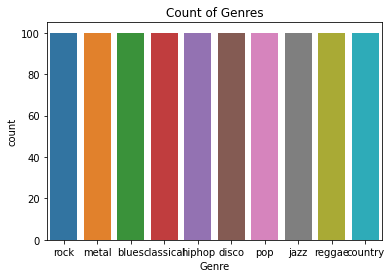

In [7]:
#Visualizing the data
plt.title("Count of Genres")
sns.countplot(genre_df.genre)
plt.xlabel('Genre')
plt.ylabel('count')
plt.show()

We have the path for each audio file and their path, we have to make s apectrogram for each file of every category and save them in their resective folders.

We first need to define the function that converts the given sound to a spectrogram.

In [8]:
def create_mel_spectrogram(file_path):
  signal, sampling_rate = librosa.load(file_path)
  mel_spec=librosa.feature.melspectrogram(signal, sr=sampling_rate)
  log_mel_spec = librosa.power_to_db(mel_spec)
  plt.figure(figsize=(12,8))
  librosa.display.specshow(log_mel_spec, sr=sampling_rate)
  plt.colorbar()
  plt.show()
  # X =  librosa.stft(signal)
  # Xdb =  librosa.amplitude_to_db(abs(X))
  # plt.figure(figsize=(12,8))
  # #plt.title('Specrtogram for audio with '+e+'Emotion', size=15)
  # librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
  # plt.colorbar()

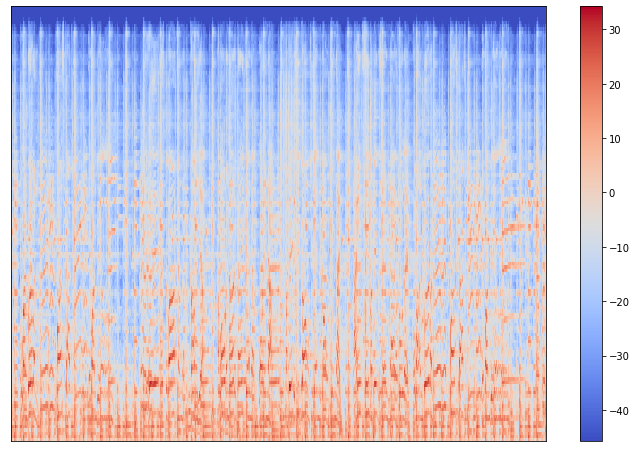

In [9]:
create_mel_spectrogram('/content/Data/genres_original/blues/blues.00000.wav')

In [10]:
print(data_list)

['rock', 'metal', 'blues', 'classical', 'hiphop', 'disco', 'pop', 'jazz', 'reggae', 'country']


In [11]:
for genre in data_list:
  pass


In [12]:
# #data preparation
# from keras.preprocessing import ImageGenerator
# datagen = ImageGenerator(rescale=1./255)
# train_generator = datagen.flow_from_dataset

In [13]:
!pip install fastai==2.3.0

     |████████████████████████████████| 194kB 19.5MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 12.8MB 237kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [14]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 19.9MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 1.2MB 51.0MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
Mounted at /content/gdrive


In [15]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.data.all import *
import os
from PIL import Image

In [16]:
category='blue','classical','county','disco','hiphop','jazz','metal','pop','reggae','rock'
path = '/content/Data/images_original'

In [17]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.25, bs=8)

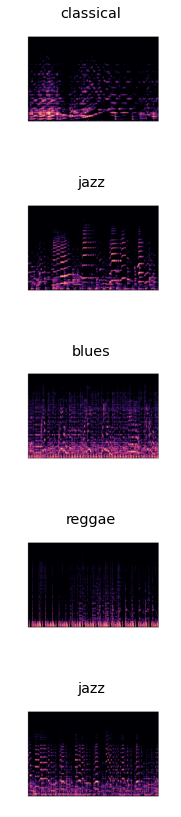

In [18]:
dls.show_batch(max_n=5, nrows=5)

In [19]:
cnn_learner??

In [20]:
#using vgg16
vgg16_model = cnn_learner(dls, vgg16_bn, metrics=[error_rate, accuracy], train_bn=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


In [21]:
vgg16_model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.204854,1.521388,0.453815,0.546185,00:38


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.509646,1.290703,0.429719,0.570281,00:56
1,1.388348,1.534395,0.425703,0.574297,00:58
2,1.184295,1.021451,0.329317,0.670683,01:00
3,0.797367,0.904771,0.277108,0.722892,01:00
4,0.450448,0.815259,0.240964,0.759036,01:00


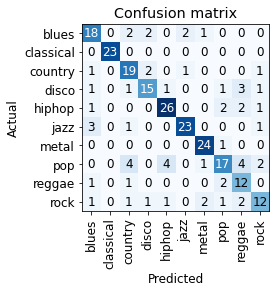

In [22]:
#Visualizing our result
matrix = ClassificationInterpretation.from_learner(vgg16_model)
matrix.plot_confusion_matrix()